In [1]:
# work in progress 01/03/2023
# allows more accurate classification of cellprofiler and harmony features
# inspired by J Harrill EPA Cell Painting methods (Nyffeler et al. 2021)

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import truncate
import seaborn as sns
from matplotlib.patches import Patch
from toxifate import *
import re


#path = r"C:\Users\Roman\OneDrive - National University of Ireland, Galway\CellPainting project data\CellProfiler\PerWell\tubesMonoByWellProfiler.csv"
path = r"C:\Users\Roman\OneDrive - National University of Ireland, Galway\CellPainting project data\Harmony\Nv6-PerWell\tubesProfiles.csv"
#path = r"C:\Users\Roman\OneDrive - National University of Ireland, Galway\CellPainting project data\Harmony\Nv6-PerWell\blastsProfiles.csv"
#path = r"C:\Users\Roman\OneDrive - National University of Ireland, Galway\CellPainting project data\CellProfiler\PerWell\tubesPolyByWellProfiler.csv"
#path = r"C:\Users\Roman\OneDrive - National University of Ireland, Galway\CellPainting project data\CellProfiler\PerWell\blastsAllByWellProfiler.csv"
#path = r"D:\OneDrive - National University of Ireland, Galway\CellPainting project data\Harmony\Nv6-PerWell\blastsProfiles.csv"

fileName = path.rsplit('\\')[-1].rsplit('.')[0]
prof = pd.read_csv(path)
prof.dropna(axis=1, inplace=True)
loael = pd.read_csv("LOAEL.csv")

if 'Metadata_Concentration (Image)' in prof.columns or 'AreaShape_Area (Nuclei)' in prof.columns:
    prof.rename(columns={'Metadata_Concentration (Image)':'Concentration', 'PlateID':'PlateName'}, inplace=True)
    prof['Count'] = prof['Count']*5
    file_type = 'cellprofiler'
else:
    file_type = 'harmony'

prof = prof.loc[prof['Count']>50]
prof = prof.loc[prof['Concentration']==1000]
prof.drop(columns=['Unnamed: 0','PlateName','Object No in All cells no border','Count','Row','Column'], inplace=True, errors='ignore')

#filter out features with standard deviation > 1000, artifacts of RobustMAD

meanProf = prof.groupby(by=['Compound','Concentration']).median(numeric_only=True)
meanProf

,,Cell 33342 Radial Mean,Cell 33342 Radial Mean Ratio SER-Bright,Cell 33342 Radial Mean Ratio SER-Dark,Cell 33342 Radial Mean Ratio SER-Edge,Cell 33342 Radial Mean Ratio SER-Hole,Cell 33342 Radial Mean Ratio SER-Ridge,Cell 33342 Radial Mean Ratio SER-Saddle,Cell 33342 Radial Mean Ratio SER-Spot,Cell 33342 Radial Mean Ratio SER-Valley,Cell 33342 Radial Mean SER-Bright,...,Ring Region Alexa 568 SER Spot 0 px,Ring Region Alexa 568 SER Valley 0 px,Ring Region Alexa 647 SER Bright 0 px,Ring Region Alexa 647 SER Dark 0 px,Ring Region Alexa 647 SER Edge 0 px,Ring Region Alexa 647 SER Hole 0 px,Ring Region Alexa 647 SER Ridge 0 px,Ring Region Alexa 647 SER Saddle 0 px,Ring Region Alexa 647 SER Spot 0 px,Ring Region Alexa 647 SER Valley 0 px
Compound,Concentration,,,,,,,,,,,,,,,,,,,,,
ATOR,1000,0.260097,-0.527349,-0.012284,-0.293603,0.113113,-0.463303,-0.134703,-0.661993,-0.086828,0.240580,...,1.419062,1.033512,-0.543518,-0.505178,0.141280,-0.492312,-0.517946,-0.287612,-0.532787,-0.460720
CERI,1000,-20.354043,-7.811773,9.953049,8.569775,9.933425,-5.858099,18.010646,-9.208515,10.173018,-21.265268,...,-2.572942,-3.250661,-1.221526,-3.400590,2.826751,-3.303056,-1.373769,-1.733907,-1.032246,-3.271831
CISP,1000,0.785458,0.220452,-0.235046,0.544058,-0.171375,-0.144278,-0.350769,0.187500,-0.315520,0.975407,...,0.520380,0.346604,-0.069540,-0.346490,-0.216835,-0.287268,-0.081226,-0.409442,0.081298,-0.238685
CLEV,1000,-0.679743,-1.109250,-0.319548,-0.005237,-0.365363,-1.199267,-0.599522,-0.665357,-0.449631,-1.091753,...,1.691996,1.481068,0.040025,0.230826,0.147155,-0.020438,0.087084,0.256338,-0.067400,0.507528
CLOF,1000,0.106950,-0.124336,-0.155660,-0.505358,-0.270975,-0.245953,-0.149369,0.058037,-0.118146,0.106822,...,1.118085,0.234626,-0.584839,-0.313049,-0.349002,-0.305329,-0.500768,-0.446985,-0.535997,-0.325352
COLC,1000,-2.425774,-1.021449,1.735524,0.998872,-0.746411,-1.362454,1.644137,0.002139,2.181394,-2.578750,...,-1.742571,-3.761968,-3.471185,-4.099202,-1.933276,-3.894741,-3.456818,-2.975160,-3.329004,-3.990790
DAPT,1000,0.699062,0.127537,-0.593806,-0.357680,-0.583689,0.210521,-0.633328,-0.673297,-0.548319,0.701253,...,0.918903,0.762967,-0.150440,-0.023294,-0.289079,0.008174,-0.054329,-0.034731,-0.187835,-0.035025
DEXA,1000,-1.634637,-5.768853,0.286024,-3.702752,2.260598,-4.603568,-0.453764,-3.963110,-0.061193,-3.175700,...,0.343518,0.373372,-0.137806,-0.404749,0.924089,-0.287847,-0.063079,-0.084258,-0.154395,-0.200547
DOXO,1000,-5.855556,-16.756074,2.542866,-7.293407,12.082159,-10.711412,3.740803,-23.966804,1.611331,-7.900121,...,3.070484,1.957396,2.425491,1.216965,9.968479,0.378478,3.418808,5.311987,2.201547,3.125138


In [2]:
featureTypeTable = cp_feature_classifier(meanProf, file_type='harmony', with_colors=True)

featureTypeTable.head()

,Feature,Region,Channel,Class,FeatureType,Region_Color,Class_Color,Channel_Color
585,Nucleus 33342 Axial Length Ratio,Nuclei,DNA,Axial,Nuclei_Axial_DNA,"[0.5529411764705883, 0.6274509803921569, 0.796...","[0.5019607843137255, 0.6941176470588235, 0.827...","[0.30196078431372547, 0.6862745098039216, 0.29..."
586,Nucleus 33342 Axial Length Ratio SER-Bright,Nuclei,DNA,Axial,Nuclei_Axial_DNA,"[0.5529411764705883, 0.6274509803921569, 0.796...","[0.5019607843137255, 0.6941176470588235, 0.827...","[0.30196078431372547, 0.6862745098039216, 0.29..."
587,Nucleus 33342 Axial Length Ratio SER-Dark,Nuclei,DNA,Axial,Nuclei_Axial_DNA,"[0.5529411764705883, 0.6274509803921569, 0.796...","[0.5019607843137255, 0.6941176470588235, 0.827...","[0.30196078431372547, 0.6862745098039216, 0.29..."
588,Nucleus 33342 Axial Length Ratio SER-Edge,Nuclei,DNA,Axial,Nuclei_Axial_DNA,"[0.5529411764705883, 0.6274509803921569, 0.796...","[0.5019607843137255, 0.6941176470588235, 0.827...","[0.30196078431372547, 0.6862745098039216, 0.29..."
589,Nucleus 33342 Axial Length Ratio SER-Hole,Nuclei,DNA,Axial,Nuclei_Axial_DNA,"[0.5529411764705883, 0.6274509803921569, 0.796...","[0.5019607843137255, 0.6941176470588235, 0.827...","[0.30196078431372547, 0.6862745098039216, 0.29..."


In [3]:
# CELLPROFILER CLASSIFICATION
# classify each column in meanProf on its cell region, channel, and type
if file_type == 'cellprofiler':
    featureList = meanProf.columns.to_list()

    featureTypeList = [x.split('_')[0] for x in featureList]
    featureRegionList = [x.split(' ')[1][1:-1] for x in featureList]
    #featureChannelList = []

    featureChannelList = [x.split('_')[2] if len(x.split('_'))==3 else x.split('_')[3] if len(x.split('_'))>=3 else "Other" for x in featureList] 

    for x in featureList:
        if (len(x.split('_')) == 3) | (len(x.split('_')) >= 5 | ( (len(x.split('_')) == 4) & (x.split('_')[0] == 'RadialDistribution'))):
            featureChannelList[featureList.index(x)] = x.split('_')[2]
        elif len(x.split('_'))==4:
            featureChannelList[featureList.index(x)] = x.split('_')[3]
        else:
            featureChannelList[featureList.index(x)] = "Other"

    featureChannelList = [x.split(' ')[0] if (len(x.split(' '))>=2) else x for x in featureChannelList]
    featureChannelList = [x if x in ['AGP','DNA','ER','MITO','RNA'] else 'Other' for x in featureChannelList]

    #create a dataframe with feature type, region, and channel
    featureTypeTable = pd.DataFrame({'Feature':featureList,'Region':featureRegionList, 'Class':featureTypeList, 'Channel':featureChannelList})

    # merge columns Region, Channel and Class into a new column FeatureType2, separated by _
    featureTypeTable["FeatureCategory"] = featureTypeTable["Region"].str.cat([featureTypeTable["Class"], featureTypeTable["Channel"]], sep="_")

    # handle the case where one of the columns is not found ('Other'  )
    featureTypeTable.loc[featureTypeTable["FeatureCategory"].str.contains("Other"), "FeatureCategory"] = featureTypeTable.loc[featureTypeTable["FeatureCategory"].str.contains("Other"), [ "Region","Class"]].apply(lambda x: "_".join(x.dropna()), axis=1)

# print the result


myFeatureTypes = featureTypeTable.value_counts('Channel')
featureTypeTable

,Feature,Region,Channel,Class,FeatureType,Region_Color,Class_Color,Channel_Color
585,Nucleus 33342 Axial Length Ratio,Nuclei,DNA,Axial,Nuclei_Axial_DNA,"[0.5529411764705883, 0.6274509803921569, 0.796...","[0.5019607843137255, 0.6941176470588235, 0.827...","[0.30196078431372547, 0.6862745098039216, 0.29..."
586,Nucleus 33342 Axial Length Ratio SER-Bright,Nuclei,DNA,Axial,Nuclei_Axial_DNA,"[0.5529411764705883, 0.6274509803921569, 0.796...","[0.5019607843137255, 0.6941176470588235, 0.827...","[0.30196078431372547, 0.6862745098039216, 0.29..."
587,Nucleus 33342 Axial Length Ratio SER-Dark,Nuclei,DNA,Axial,Nuclei_Axial_DNA,"[0.5529411764705883, 0.6274509803921569, 0.796...","[0.5019607843137255, 0.6941176470588235, 0.827...","[0.30196078431372547, 0.6862745098039216, 0.29..."
588,Nucleus 33342 Axial Length Ratio SER-Edge,Nuclei,DNA,Axial,Nuclei_Axial_DNA,"[0.5529411764705883, 0.6274509803921569, 0.796...","[0.5019607843137255, 0.6941176470588235, 0.827...","[0.30196078431372547, 0.6862745098039216, 0.29..."
589,Nucleus 33342 Axial Length Ratio SER-Hole,Nuclei,DNA,Axial,Nuclei_Axial_DNA,"[0.5529411764705883, 0.6274509803921569, 0.796...","[0.5019607843137255, 0.6941176470588235, 0.827...","[0.30196078431372547, 0.6862745098039216, 0.29..."
...,...,...,...,...,...,...,...,...
898,Nucleus Ratio Width to Length (2),Nuclei,Other,Other,Nuclei_Other_Other,"[0.5529411764705883, 0.6274509803921569, 0.796...","[0.9882352941176471, 0.803921568627451, 0.8980...","[1.0, 1.0, 0.2]"
899,Nucleus Roundness,Nuclei,Other,Other,Nuclei_Other_Other,"[0.5529411764705883, 0.6274509803921569, 0.796...","[0.9882352941176471, 0.803921568627451, 0.8980...","[1.0, 1.0, 0.2]"
900,Nucleus Roundness (2),Nuclei,Other,Other,Nuclei_Other_Other,"[0.5529411764705883, 0.6274509803921569, 0.796...","[0.9882352941176471, 0.803921568627451, 0.8980...","[1.0, 1.0, 0.2]"
901,Nucleus Width [µm],Nuclei,Other,Other,Nuclei_Other_Other,"[0.5529411764705883, 0.6274509803921569, 0.796...","[0.9882352941176471, 0.803921568627451, 0.8980...","[1.0, 1.0, 0.2]"


In [4]:
# HARMONY CLASSIFICATION
df = meanProf
if file_type == 'harmony':
    region_list = ['Cell', 'Nucleus', 'Cytoplasm', 'Ring', 'Other']
    channel_list = ['33342 ','488 ','568 ','555 ','647 ','Mito']
    class_list = ['Texture','Intensity','Symmetry','Axial', 'Compactness','Radial','Profile','SER']
    
#elif file_type == 'cellprofiler':
#    region_list = ['Cytoplasm', 'Cells', 'Nuclei', 'Other']
#    channel_list = ['MITO', 'DNA', 'ER', 'RNA', 'AGP', 'Other']
#    class_list = ['AreaShape', 'Granularity', 'Intensity', 'Location', 'Neighbors','RadialDistribution', 'Texture', 'Correlation','Position','Parent']
else:
    raise ValueError('file_type must be either "harmony" or "cellprofiler"')
regions, channels, classes = [], [], []
# Iterate through the column names
for col in df.columns:
    regionFound, channelFound, classFound = False, False, False
    # Iterate through the region list
    for region_name in region_list:
        if region_name in col and not regionFound:
            regions.append(region_name)
            regionFound = True
            break
    # Iterate through the channel list
    for channel_name in channel_list:
        if channel_name in col and not channelFound:
            channels.append(channel_name)
            channelFound = True
            break
    # Iterate through the class list
    for class_name in class_list:
        if class_name in col and not classFound:
            classes.append(class_name)
            classFound = True
            break
    if not regionFound:
        regions.append('Other')
    if not channelFound:
        channels.append('Other')
    if not classFound:
        classes.append('Other')
#create a dataframe with feature type, region, and channel, and a last column with the three concatenated with underscores
featureTypeTable = pd.DataFrame({'Feature':df.columns, 'Region':regions, 'Channel':channels, 'Class':classes}).sort_values(by=['Channel','Class','Region'])
# rename channels to match cellprofiler
featureTypeTable['Channel'] = featureTypeTable['Channel'].replace({'33342 ':'DNA', '488 ':'AGP', '568 ':'RNA', '555 ':'ER', '647 ':'Mito', 'MITO':'Mito', })
featureTypeTable['Class'] = featureTypeTable['Class'].replace({'SER':'Texture'})
featureTypeTable['Region'] = featureTypeTable['Region'].replace({'Nucleus':'Nuclei', 'Cell':'Cells'})
featureTypeTable['FeatureType'] = featureTypeTable['Region'] + '_' + featureTypeTable['Class'] + '_' + featureTypeTable['Channel']

# display unique values of FeatureType
myFeatureTypes = featureTypeTable.value_counts('Class')
featureTypeTable

,Feature,Region,Channel,Class,FeatureType
585,Nucleus 33342 Axial Length Ratio,Nuclei,DNA,Axial,Nuclei_Axial_DNA
586,Nucleus 33342 Axial Length Ratio SER-Bright,Nuclei,DNA,Axial,Nuclei_Axial_DNA
587,Nucleus 33342 Axial Length Ratio SER-Dark,Nuclei,DNA,Axial,Nuclei_Axial_DNA
588,Nucleus 33342 Axial Length Ratio SER-Edge,Nuclei,DNA,Axial,Nuclei_Axial_DNA
589,Nucleus 33342 Axial Length Ratio SER-Hole,Nuclei,DNA,Axial,Nuclei_Axial_DNA
...,...,...,...,...,...
898,Nucleus Ratio Width to Length (2),Nuclei,Other,Other,Nuclei_Other_Other
899,Nucleus Roundness,Nuclei,Other,Other,Nuclei_Other_Other
900,Nucleus Roundness (2),Nuclei,Other,Other,Nuclei_Other_Other
901,Nucleus Width [µm],Nuclei,Other,Other,Nuclei_Other_Other


C:\Users\Roman\AppData\Local\Temp\ipykernel_3628\411388884.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


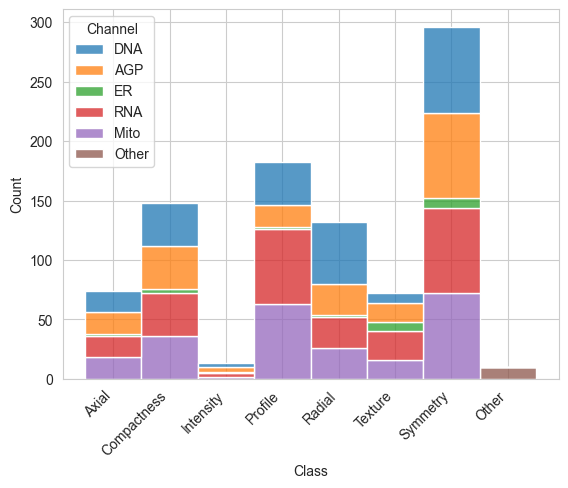

In [5]:
sns.set_style("whitegrid")
g = sns.histplot(data=featureTypeTable, x="Class", hue="Channel", multiple='stack')
#rotate x labels
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

# show the plot
plt.show()

In [6]:
# Modify the column names
import os
Table1 = meanProf

nyffelerFeatureCategories = pd.read_csv("C:\\Users\\Roman\\Downloads\\Supplementary Data Object 4 - BMC modeling results (category-level).csv")


nyffelerFeatureCategories = nyffelerFeatureCategories['Category.Name'].unique()
featureCategoriesNyf = pd.DataFrame(nyffelerFeatureCategories)
featureCategoriesNyf[['Channel','Type','Region']] = featureCategoriesNyf[0].str.split('_',expand=True)
featureCategoriesNyf.drop(columns=[0], inplace=True)
nyffelerFeatureCategories = nyffelerFeatureCategories.tolist()

In [7]:
# find the features that are in nyffelerFeatureCategories and not in myFeatureTypes
missingFeatures = [x for x in nyffelerFeatureCategories if x not in myFeatureTypes]
missingFeatures



['AGP_Axial_Cells',
 'AGP_Compactness_Cells',
 'AGP_Intensity_Cytoplasm',
 'AGP_Intensity_Membrane',
 'AGP_Intensity_Ring',
 'AGP_Profile_Cytoplasm',
 'AGP_Profile_Nuclei',
 'AGP_Radial_Cells',
 'AGP_Symmetry_Cells',
 'AGP_Texture_Cytoplasm',
 'AGP_Texture_Membrane',
 'AGP_Texture_Ring',
 'DNA_Axial_Nuclei',
 'DNA_Compactness_Nuclei',
 'DNA_Intensity_Nuclei',
 'DNA_Profile_Cytoplasm',
 'DNA_Profile_Nuclei',
 'DNA_Radial_Cells',
 'DNA_Radial_Nuclei',
 'DNA_Symmetry_Nuclei',
 'DNA_Texture_Nuclei',
 'ER_Axial_Cells',
 'ER_Compactness_Cells',
 'ER_Intensity_Cytoplasm',
 'ER_Intensity_Ring',
 'ER_Profile_Cytoplasm',
 'ER_Radial_Cells',
 'ER_Symmetry_Cells',
 'ER_Texture_Cytoplasm',
 'ER_Texture_Ring',
 'Mito_Axial_Cells',
 'Mito_Compactness_Cells',
 'Mito_Intensity_Cytoplasm',
 'Mito_Intensity_Ring',
 'Mito_Profile_Cytoplasm',
 'Mito_Profile_Nuclei',
 'Mito_Radial_Cells',
 'Mito_Symmetry_Cells',
 'Mito_Texture_Cytoplasm',
 'Mito_Texture_Ring',
 'Position',
 'RNA_Axial_Nuclei',
 'RNA_Compact